#Experiment 1: Linear Programming
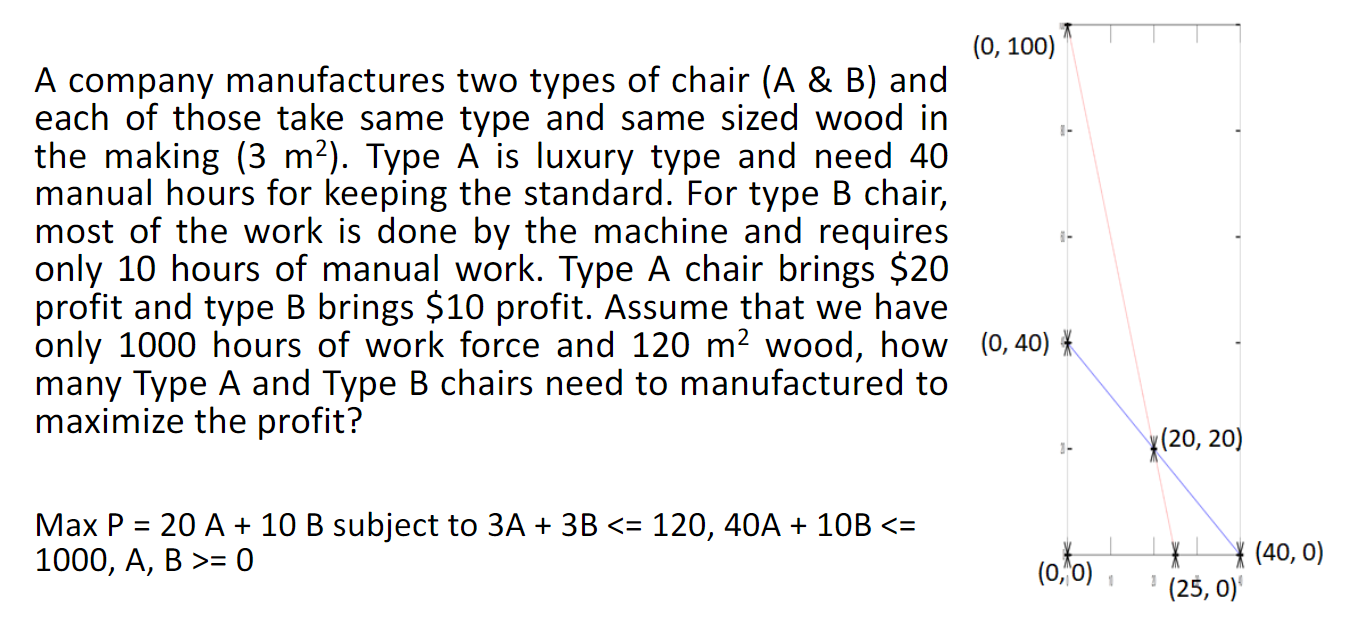

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from cvxopt import matrix, solvers
import cvxpy as cp

In [ ]:
A = matrix([ [3.0, 40.0, -1.0, 0.0], [3.0, 10.0, 0.0, -1.0] ])
b = matrix([ 120.0, 1000.0, 0.0, 0.0 ])
C = matrix([ -20.0, -10.0 ])
sol=solvers.lp(C,A,b)

print(sol['x'])

     pcost       dcost       gap    pres   dres   k/t
 0: -5.8772e+02 -2.6111e+03  8e+01  0e+00  4e+00  1e+00
 1: -5.9823e+02 -6.8833e+02  3e+00  2e-16  2e-01  6e-02
 2: -5.9998e+02 -6.0090e+02  3e-02  3e-18  2e-03  6e-04
 3: -6.0000e+02 -6.0001e+02  3e-04  2e-16  2e-05  6e-06
 4: -6.0000e+02 -6.0000e+02  3e-06  2e-16  2e-07  6e-08
 5: -6.0000e+02 -6.0000e+02  3e-08  2e-16  2e-09  6e-10
Optimal solution found.
[ 2.00e+01]
[ 2.00e+01]



In [ ]:
A = matrix([ [3.0, 40.0, -1.0, 0.0], [3.0, 10.0, 0.0, -1.0] ])
b = matrix([ 120.0, 1000.0, 0.0, 0.0 ])
C = matrix([ 20.0, 10.0 ])
x = cp.Variable(shape=(2, 1)); 
objFn = cp.Maximize(C.T @ x);
const = [A @ x <= b];
prob = cp.Problem(objFn, const);
opt_val = prob.solve();
print(x.value)

[[19.99999998]
 [20.00000001]]


#Plot a line y = theta'*X and the 2D Data (myDx, myDy)

In [5]:
def plotMyline(theta, myDx, myDy):
  xRange = np.linspace(-4.0, 4.0, 100);
  colOnes = np.ones([len(xRange)]);
  XFeatures = np.vstack((xRange,colOnes));
  yRange = np.matmul(XFeatures.T,theta);
  plt.scatter(myDx, myDy);
  plt.scatter(xRange, yRange, s = 3, c = 'k')
  plt.show()

#Experiment 2: Fit a line (Linear Regression: Ax = y) Direct closed form solution

[[1.]
 [0.]]


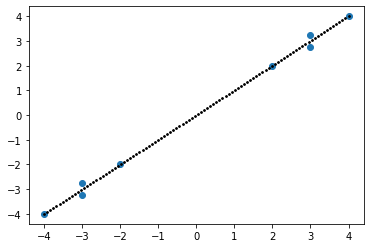

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], (8,1));
M = A.T*A;
theta = np.matmul(np.linalg.inv(M), A.T*y);
print (theta)
plotMyline(theta, A[:, 0], y);

#Experiment 3: Fit a line (Linear Regression: Ax = y) Built-in function pinv

[[ 1.00000000e+00]
 [-1.11022302e-16]]


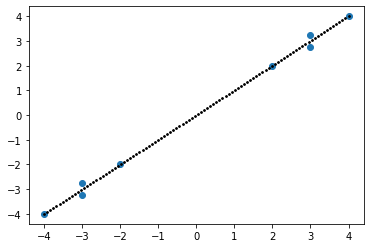

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], (8,1));
M = A.T*A;
theta = np.matmul(np.linalg.pinv(A), y);
print (theta)
plotMyline(theta, A[:, 0], y);

#Experiment 4: Fit a line (Linear Regression: Ax = y), Knowing the theory that the solution to Ax = b is the one that minimise the function 1/2 x'Qx + b'x + c

[ 1.00e+00]
[-0.00e+00]



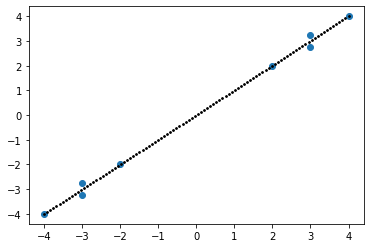

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25]);
Q = A.T*A;
b = -1*A.T*y;
sol= solvers.qp(Q, b)  #minimise 1/2x'Qx+b'x+c
theta = sol['x'];
print (theta)
plotMyline(theta, A[:, 0], y);

#Experiment 5: Fit a line (Linear Regression: Ax = y), using Gradient Descent

In [ ]:
def myPrediction(X, theta):
    return np.matmul(X, theta)

def cost_functionMSE(X, Y, theta):
    J = np.sum((np.matmul(X, theta) -Y)**2)/len(Y)  
    return J

def gradient_descent_LinR(X, Y, theta, alpha, iterations):
    n = len(Y)
    cost_history = [0] * iterations
    for iteration in range(iterations):
        y_pred =  myPrediction(X, theta); #matrix(np.matmul(X, theta));
        loss = y_pred-Y
        gradient = np.matmul(loss.T, X)*(2/n); 
        theta = theta - alpha*gradient.T
        cost = cost_functionMSE(X, Y, theta)
        cost_history[iteration] = cost
        if(cost>cost_history[iteration-1]):
            alpha = alpha*0.1;
        if (np.linalg.norm(gradient) < 0.001):
            return theta;
    return theta 

[[9.99948753e-01]
 [1.11022302e-19]]


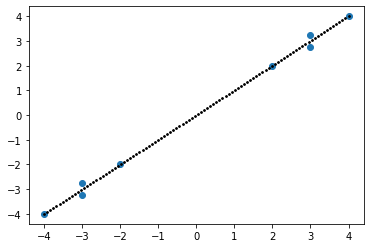

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], (8, 2));
y = matrix([-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], (8, 1));
theta = matrix([0, 0], (2, 1))
theta = gradient_descent_LinR(A,y,theta,0.01,1000)
print(theta)
plotMyline(theta, A[:, 0], y);

#Experiment 6: Fit a line (Linear Regression: Ax = y), using conjugate Gradient Method

In [7]:
def normalGD(A, x0, b):
    xa = x0;
    for i in range(100):
        g = np.matmul(A, x0) - b;
        #if (np.linalg.norm(g) < 0.001):
          #break;
        alpha = np.dot(g.T, g)/np.dot(g.T, np.matmul(A, g));
        xn = x0 - alpha*g;
        if (np.linalg.norm(np.matmul(A, xn) - b ) < 0.001):
          break;
        xa = np.hstack((xa, xn));
        x0 = xn; 
    return xa, i;

def cGM(A, x0, b):
    xa = x0;
    g  = np.matmul(A, x0) - b;
    if (np.linalg.norm(g) < 0.001):
      return xa, 0;
    else:
      d = -g;
      for i in range(10):
        alpha = np.dot(-g.T, d)/(np.dot(d.T, np.matmul(A, d)));
        xn = x0 + alpha*d;
        g = np.matmul(A, xn) - b;
        xa = np.hstack((xa, xn)); 
        if (np.linalg.norm(np.matmul(A, xn) - b) < 0.01):
           break;
        Bn = np.dot(g.T, np.matmul(A, d))/(np.dot(d.T, np.matmul(A, d)));
        d = -g + Bn * d;
        x0 = xn;
    return xa, i;

def plotContour(xa, Q, b, mnR, mxR):
    xRange = np.linspace(mnR, mxR, 100);
    yRange = np.linspace(mnR, mxR, 100);
    [XX, YY] = np.meshgrid(xRange, yRange);
    [m, n] = np.shape(XX);
    ZZ = np.zeros(np.shape(XX));
    for j in range(m):
        for k in range(n):
            myX = np.vstack((XX[j, k], YY[j, k]));
            ZZ[j, k] = (1/2)*np.matmul(np.matmul(myX.T, Q), myX) - np.matmul(b.T, myX); 
    plt.contourf(XX, YY, ZZ)
    plt.plot (xa[0, :], xa[1, :]); 
    plt.plot (xa[0, :], xa[1, :], '.'); plt.axis('equal'); plt.show();

[9.99957932e-01 7.36195379e-05]


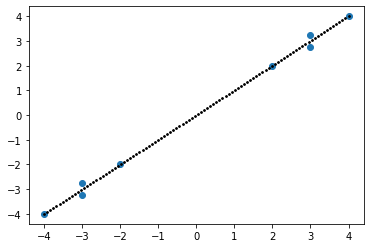

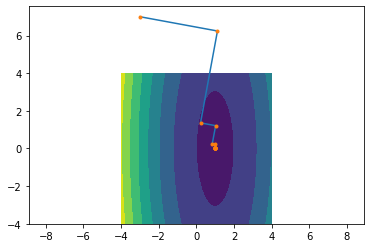

Number of iterations 15


In [9]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], (8, 2));
y = matrix([-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], (8, 1));
Q = A.T*A;
b = A.T*y;
theta = matrix([-3, 7], (2, 1));
xa, i = normalGD(Q, theta, b); #normal GD x0 = [-3; 7] Ax - b Thresh = 0.01 i = 15
theta = xa[:, -1];
print(theta)
plotMyline(theta, A[:, 0], y);

plotContour(xa, Q, b, -4, 4);
print('Number of iterations '+ str(i+1));

#Experiment 7: Fit a line (Linear Regression: Ax = y), using CVXPY

[[ 1.00000000e+00]
 [-6.22421251e-12]]


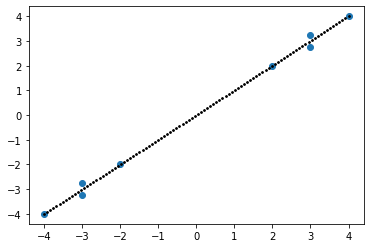

In [ ]:
import warnings
warnings.filterwarnings("ignore")
#from cvxpy import *
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]], (8, 2));
y = matrix([-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], (8, 1));
x = cp.Variable(shape=(2, 1)); 
obj = cp.Minimize(cp.norm(A*x-y));
prob = cp.Problem(obj);
opt_val = prob.solve();
theta = x.value;
print(theta)
plotMyline(theta, A[:, 0], y);

#Experiment 8: Find the log reg boundary using Gradient Descent 

In [ ]:
def myPrediction(x, theta):
    pred = np.dot(x, theta)
    return 1 / (1 + np.exp(-pred))

def cost_functionBCE(x, y, theta):
    n = len(y) 
    J = -(1 / n) * np.sum(y * np.log(myPrediction(x, theta)) + (1 - y) * np.log(1 - myPrediction(x, theta)))
    return J

def gradient_ascent_LogR1(X, Y, theta, alpha, iterations):
    for iteration in range(iterations):
        exp_thetaTX =  np.exp(np.matmul(A, theta));
        term1 = np.multiply(np.repeat(y, 3, 1), A);
        term2 = np.multiply(np.repeat(np.multiply(1/(1+exp_thetaTX), exp_thetaTX), 3, 1), X);
        gradient = matrix(np.sum(term1 - term2, 0), (3, 1));
        theta = theta + alpha*gradient;
        if (np.linalg.norm(gradient) < 0.0001):
            return theta;
    return theta 

def gradient_descent_LogR1(X, Y, theta, alpha, iterations):
    n = len(Y)
    cost_history = [0] * iterations
    for iteration in range(iterations):
        y_pred =  myPrediction(X, theta);
        loss = y_pred-Y
        gradient = np.matmul(loss.T, X)*(2/n); 
        theta = theta - alpha*gradient.T
        cost = cost_functionBCE(X, Y, theta)
        cost_history[iteration] = cost
        if(cost>cost_history[iteration-1]):
            alpha = alpha*0.1;
        if (np.linalg.norm(gradient) < 0.0001):
            return theta;
    return theta 


[ 1.18e-02]
[ 1.18e-02]
[ 2.55e-20]



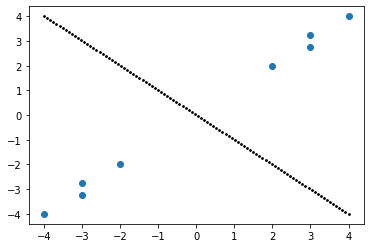

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]);
theta = matrix([0, 0, 0], (3, 1));
sol = gradient_ascent_LogR1(A,y,theta,0.00001,100)
print(sol)
theta = [-sol[0]/sol[1], -sol[2]/sol[1]]
plotMyline(theta, A[:, 0], A[:, 1]);

[[3.26833587e-04]
 [3.26833313e-04]
 [4.02455846e-22]]


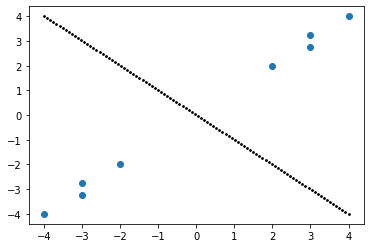

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]);
theta = matrix([0, 0, 0], (3, 1));
sol = gradient_descent_LogR1(A,y,theta,0.00001,100)
print(sol)
theta = [-sol[0]/sol[1], -sol[2]/sol[1]]
plotMyline(theta, A[:, 0], A[:, 1]);

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]);
theta = matrix([0.5928, 0.5928, 0], (3, 1));
J1 = cost_functionBCE(A, y, theta);
print(J1)
theta = matrix([8.4796, 1.2668, -0.7340], (3, 1));
J2 = cost_functionBCE(A, y, theta);
print(J2)
#print(J2) #See that J2 (0) > J1 (0.03)

0.03869942753655283
nan


#Experiment 9: Find the log reg boundary using CVXPY

[[ 8.4796316 ]
 [ 1.26680074]
 [-0.73406764]]


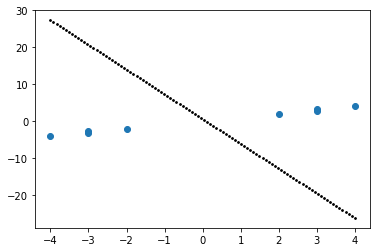

In [ ]:
#Solve Logistic regression using cvx
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]);
x = cp.Variable(shape=(3, 1)); 
logLik = cp.sum(cp.multiply(y, A @ x) - cp.logistic(A @ x));
obj = cp.Maximize(logLik);
prob = cp.Problem(obj);
opt_val = prob.solve();
sol = x.value;
print(sol)
#plot the line y = theta'*x
theta = [-sol[0]/sol[1], -sol[2]/sol[1]];
plotMyline(theta, A[:, 0], A[:, 1]);

In [ ]:
def cost_functionLk(A, y, theta):
    return np.sum(y * np.matmul(A,theta) + np.log((1/(1+np.exp(np.matmul(A,theta))))));

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25], [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]]);
y = matrix([0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0]);
theta = matrix([0.5928, 0.5928, 0], (3, 1));
J1 = cost_functionLk(A, y, theta);
print(J1)
theta = matrix([8.4796, 1.2668, -0.7340], (3, 1));
J2 = cost_functionLk(A, y, theta);
print(J2) #See that J2 (0) > J1 (-0.3)

-0.30959542029242315
-8.775086880703035e-09


#Experiment 10: Fit a parabola: Using CVX
Fitting a quadratic curve to a set of data points. The data is generated by adding gaussian noise to points sampled from a quadratic curve f(x)=a∗x2+b∗x+c 

In [ ]:
a,b,c = 2.5,-1.4,10
xD = np.arange(-10,10);
yD = a*xD**2 + b*xD + c
colOnes = np.ones([len(xD)]);
A = matrix(np.vstack((np.square(xD),xD,colOnes)));
y = matrix(yD + np.random.randn(xD.shape[0])*10)

[[ 2.5050814 ]
 [-0.98750637]
 [ 5.59288808]]


Text(0.5, 1.0, '$f(x) = 2.5*x^2 + -1.4*x + 10$')

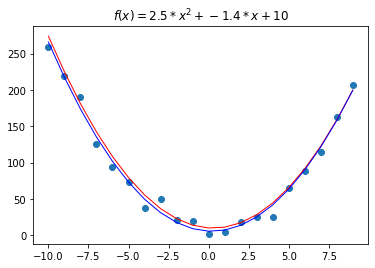

In [ ]:
x = cp.Variable(shape=(3, 1)); 
obj = cp.Minimize(cp.norm(A.T @ x-y));
prob = cp.Problem(obj);
opt_val = prob.solve();
theta = x.value;
print(theta)
yP = A.T @ theta;
plt.scatter(xD,y) #Plot data points
plt.plot(xD,yD,'-r',lw=1) #plot original curve in red
plt.plot(xD,yP,'-b',lw=1) #plot predicted curve in blue
plt.title("$f(x) = %s*x^2 + %s*x + %s$" % (a,b,c))

#Experiment 11: Fit an exponential curve : Using CVX
curve f(X)=e^(aX2+bX+C).

Text(0.5, 1.0, '$f(x) = \\exp(0.01*x^2 + -1.4*x + 1)$')

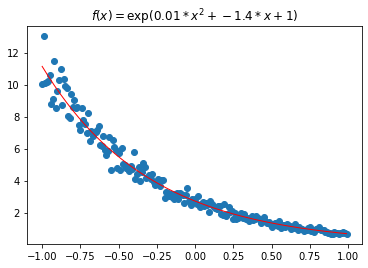

In [ ]:
a,b,c = 1e-2,-1.4,1
xD = np.arange(-1,1,0.01)
yD = np.exp(a*xD**2 + b*xD + c)
colOnes = np.ones([len(xD)]);
A = matrix(np.vstack((np.square(xD),xD,colOnes)));
y = matrix(np.exp(a*xD**2 + b*xD + c + np.random.randn(xD.shape[0])*1e-1), (len(xD), 1))
plt.scatter(xD,y)
plt.plot(xD,yD,'-r',lw=1)
plt.title("$f(x) = \exp(%s*x^2 + %s*x + %s)$" % (a,b,c))

In [ ]:
x = cp.Variable(shape=(3, 1)); 
lossF1 = cp.Minimize(cp.norm(cp.exp(A.T @ x)-y));
prob = cp.Problem(lossF1);
print("Is the problem DCP: ", prob.is_dcp())

Is the problem DCP:  False


#We can actually convert the problem to DCP by doing a log transform on RHS and LHS of the equation. This effectively converts the problem into the earlier quadratic curve fitting problem.

Is the problem DCP:  True
[[ 0.01416266]
 [-1.40917761]
 [ 0.99342711]]


Text(0.5, 1.0, '$f(x) = 0.01*x^2 + -1.4*x + 1$')

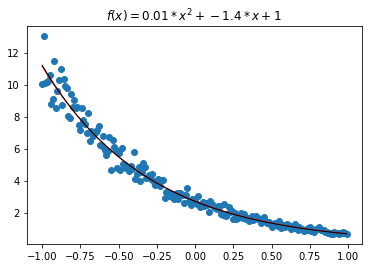

In [ ]:
x = cp.Variable(shape=(3, 1)); 
lossF2 = cp.Minimize(cp.norm(A.T @ x-np.log(y)));
prob = cp.Problem(lossF2);
print("Is the problem DCP: ", prob.is_dcp())

opt_val = prob.solve();
theta = x.value;
print(theta)
yP = np.exp(A.T @ theta);
plt.scatter(xD,y) #Plot data points
plt.plot(xD,yD,'-r',lw=1) #plot original curve in red
plt.plot(xD,yP,'-k',lw=1) #plot predicted curve in blue
plt.title("$f(x) = %s*x^2 + %s*x + %s$" % (a,b,c))

#QP with constraints : CVXPY

Solving QP
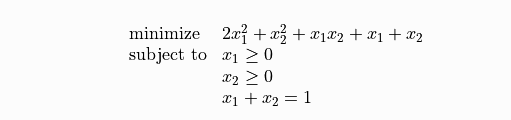

In [ ]:
#solve constrained QP
from cvxopt import matrix, solvers
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
G = matrix([[-1.0,0.0],[0.0,-1.0]])
h = matrix([0.0,0.0])
A = matrix([[1.0], [1.0]])
b = matrix(1.0)
sol=solvers.qp(Q, p, G, h, A, b)
print (sol['x'])

     pcost       dcost       gap    pres   dres
 0:  1.8889e+00  7.7778e-01  1e+00  2e-16  2e+00
 1:  1.8769e+00  1.8320e+00  4e-02  2e-16  6e-02
 2:  1.8750e+00  1.8739e+00  1e-03  2e-16  5e-04
 3:  1.8750e+00  1.8750e+00  1e-05  1e-16  5e-06
 4:  1.8750e+00  1.8750e+00  1e-07  1e-16  5e-08
Optimal solution found.
[ 2.50e-01]
[ 7.50e-01]



In [ ]:
Q = 2*matrix([ [2, .5], [.5, 1] ])
p = matrix([1.0, 1.0])
A = matrix([[1.0], [1.0]])
b = matrix(1.0)

x = cp.Variable(shape=(2, 1));
objFn = cp.Minimize((1/2)*cp.quad_form(x, Q) + p.T @ x);
const = [x >= 0, A @ x == b];
prob = cp.Problem(objFn, const);
opt_val = prob.solve();
print(x.value)


[[0.25]
 [0.75]]


#Experiment 12: CP with Equality constraint (PCA)

In [ ]:
A = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25]]);
[m, n] = np.shape(A)
S = (1/(m-1))*np.cov(A.T)
x = cp.Variable(shape=(2, 1)); 
objFn = cp.Maximize(cp.quad_form(x, S));
const = [cp.norm(x) == 1];
prob = cp.Problem(objFn, const);
opt_val = prob.solve();
theta = x.value;
print(theta)

DCPError: ignored

#Experiment 13: CP with InEquality Constraints SVM

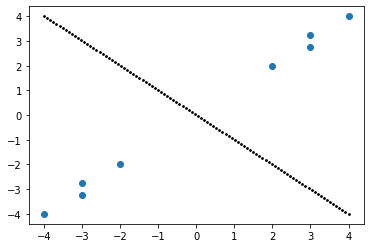

In [ ]:
X = matrix([[-2.0, -4.0, -3.0, -3.0, 2.0, 4.0, 3.0, 3.0], [-2.0, -4.0, -2.75, -3.25, 2.0, 4.0, 2.75, 3.25]]);
Y = matrix([-1.0, -1.0, -1.0, -1.0, 1.0, 1.0, 1.0, 1.0]);
[n, d] = np.shape(X);
W = cp.Variable(shape=(d, 1));
b = cp.Variable(shape=(1, 1));
objFn = cp.Minimize(cp.norm(W));
colOnes = matrix(np.ones([len(Y)]), (8, 1));
const = [cp.multiply(Y, X @ W + b) >= colOnes];
prob = cp.Problem(objFn, const);
opt_val = prob.solve();
W = W.value; b = b.value;
theta = np.array([-W[0]/W[1], -b/W[1]], dtype=object);
plotMyline(theta, X[:, 0], X[:, 1]);

http://shubhanshu.com/blog/convex-optimization-cvxpy.html

https://vitalflux.com/cross-entropy-loss-explained-with-python-examples/ 

https://stanford.edu/~boyd/cvxbook/bv_cvxbook_extra_exercises.pdf

https://www.cvxpy.org/examples/machine_learning/logistic_regression.html

https://arunaddagatla.medium.com/maximum-likelihood-estimation-in-logistic-regression-f86ff1627b67
https://stackoverflow.com/questions/66849908/cvxpy-constraints-formulation?rq=1

https://www.cvxpy.org/tutorial/intro/index.html

https://www.cvxpy.org/examples/basic/quadratic_program.html

http://ask.cvxr.com/t/why-isnt-cvx-accepting-my-model-read-this-first/570
